In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data = pd.read_excel('Data_Train.xlsx')

In [3]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.describe(include='all')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683,10683.000000
unique,12,44,5,6,128,222,1343,368,5,10,NaN
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info,NaN
freq,3849,504,4537,4537,2376,233,423,550,5625,8345,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9087.064121
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4611.359167
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1759.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5277.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8372.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12373.000000


In [6]:
data.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])

In [9]:
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_month'] = data['Date_of_Journey'].dt.month

In [10]:
def stops(d):
    if d=="non-stop":
        return 0
    else:
        return int(d[0])

data['Total_Stops'] = data['Total_Stops'].apply(stops)

In [11]:
data.drop(['Date_of_Journey'],axis=1,inplace=True)

In [12]:
data.tail()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,4,9
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,3,1
10682,Air India,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2,No info,11753,5,9


In [13]:
dur_hour = []
dur_min = []
for row in data['Duration']:
    hr = 0
    m = 0
    if 'h' in row and 'm' in row:
        hr_min = row.split()
        hr = hr_min[0].replace('h','')
        m = hr_min[1].replace('m','')
    elif 'h' in row:
        hr = row.replace('h','')
        
    else:
        m = row.replace('m','')
    dur_hour.append(int(hr))
    dur_min.append(int(m))
print(len(dur_hour))
print(len(dur_min))

10682
10682


In [14]:
data['Duration_hours'] = dur_hour
data['Duration_minutes'] = dur_min

In [15]:


data['Arrival_hour'] = data['Arrival_Time'].str.split(':').str[0].astype(int)
data['Arrival_min'] = data['Arrival_Time'].str.split(':').str[1].str[:2].astype(int)


In [16]:
data['Dep_hour'] = data['Dep_Time'].str.split(':').str[0].astype(int)
data['Dep_min'] = data['Dep_Time'].str.split(':').str[1].str[:2].astype(int)

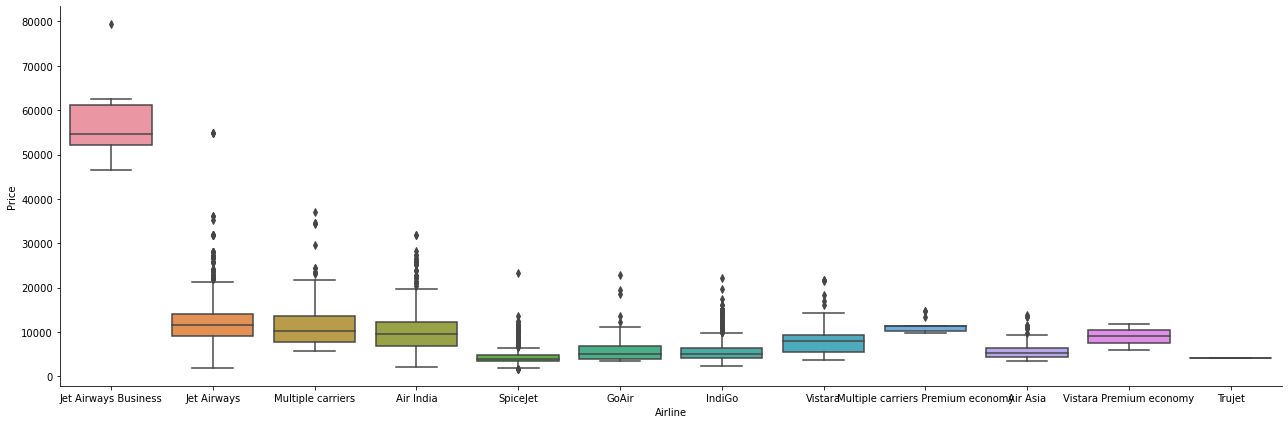

In [17]:
sns.catplot(y = "Price", x = "Airline", data = data.sort_values("Price", ascending = False), kind="box", height = 6, aspect = 3);
plt.show()

In [18]:
Airline = pd.get_dummies( data[['Airline']],drop_first=True)
Dest = pd.get_dummies(data[['Destination']],drop_first=True)
Source = pd.get_dummies(data[['Source']],drop_first=True)

In [19]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Duration_hours,Duration_minutes,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,2,50,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,5,1,7,25,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,6,9,19,0,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,5,12,5,25,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3,1,4,45,21,35,16,50


In [20]:
data.drop(['Route','Dep_Time','Arrival_Time','Duration','Additional_Info'],axis=1,inplace=True)

In [21]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Duration_hours,Duration_minutes,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2,50,1,10,22,20
1,Air India,Kolkata,Banglore,2,7662,5,1,7,25,13,15,5,50
2,Jet Airways,Delhi,Cochin,2,13882,6,9,19,0,4,25,9,25
3,IndiGo,Kolkata,Banglore,1,6218,5,12,5,25,23,30,18,5
4,IndiGo,Banglore,New Delhi,1,13302,3,1,4,45,21,35,16,50


In [22]:
data = pd.concat([data,Airline,Dest,Source],axis=1)

In [23]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Duration_hours,Duration_minutes,Arrival_hour,...,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2,50,1,...,0,0,0,0,0,1,0,0,0,0
1,Air India,Kolkata,Banglore,2,7662,5,1,7,25,13,...,0,0,0,0,0,0,0,0,1,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,19,0,4,...,0,1,0,0,0,0,0,1,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,5,25,23,...,0,0,0,0,0,0,0,0,1,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,4,45,21,...,0,0,0,0,0,1,0,0,0,0


In [24]:
data.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [25]:
data.head()

,Total_Stops,Price,Journey_day,Journey_month,Duration_hours,Duration_minutes,Arrival_hour,Arrival_min,Dep_hour,Dep_min,...,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,3897,24,3,2,50,1,10,22,20,...,0,0,0,0,0,1,0,0,0,0
1,2,7662,5,1,7,25,13,15,5,50,...,0,0,0,0,0,0,0,0,1,0
2,2,13882,6,9,19,0,4,25,9,25,...,0,1,0,0,0,0,0,1,0,0
3,1,6218,5,12,5,25,23,30,18,5,...,0,0,0,0,0,0,0,0,1,0
4,1,13302,3,1,4,45,21,35,16,50,...,0,0,0,0,0,1,0,0,0,0


In [26]:
X = data.drop(['Price'],axis=1)
y = data['Price']

In [27]:
X.head()

,Total_Stops,Journey_day,Journey_month,Duration_hours,Duration_minutes,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Airline_Air India,...,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,24,3,2,50,1,10,22,20,0,...,0,0,0,0,0,1,0,0,0,0
1,2,5,1,7,25,13,15,5,50,1,...,0,0,0,0,0,0,0,0,1,0
2,2,6,9,19,0,4,25,9,25,0,...,0,1,0,0,0,0,0,1,0,0
3,1,5,12,5,25,23,30,18,5,0,...,0,0,0,0,0,0,0,0,1,0
4,1,3,1,4,45,21,35,16,50,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
train = pd.concat([X,y],axis=1)

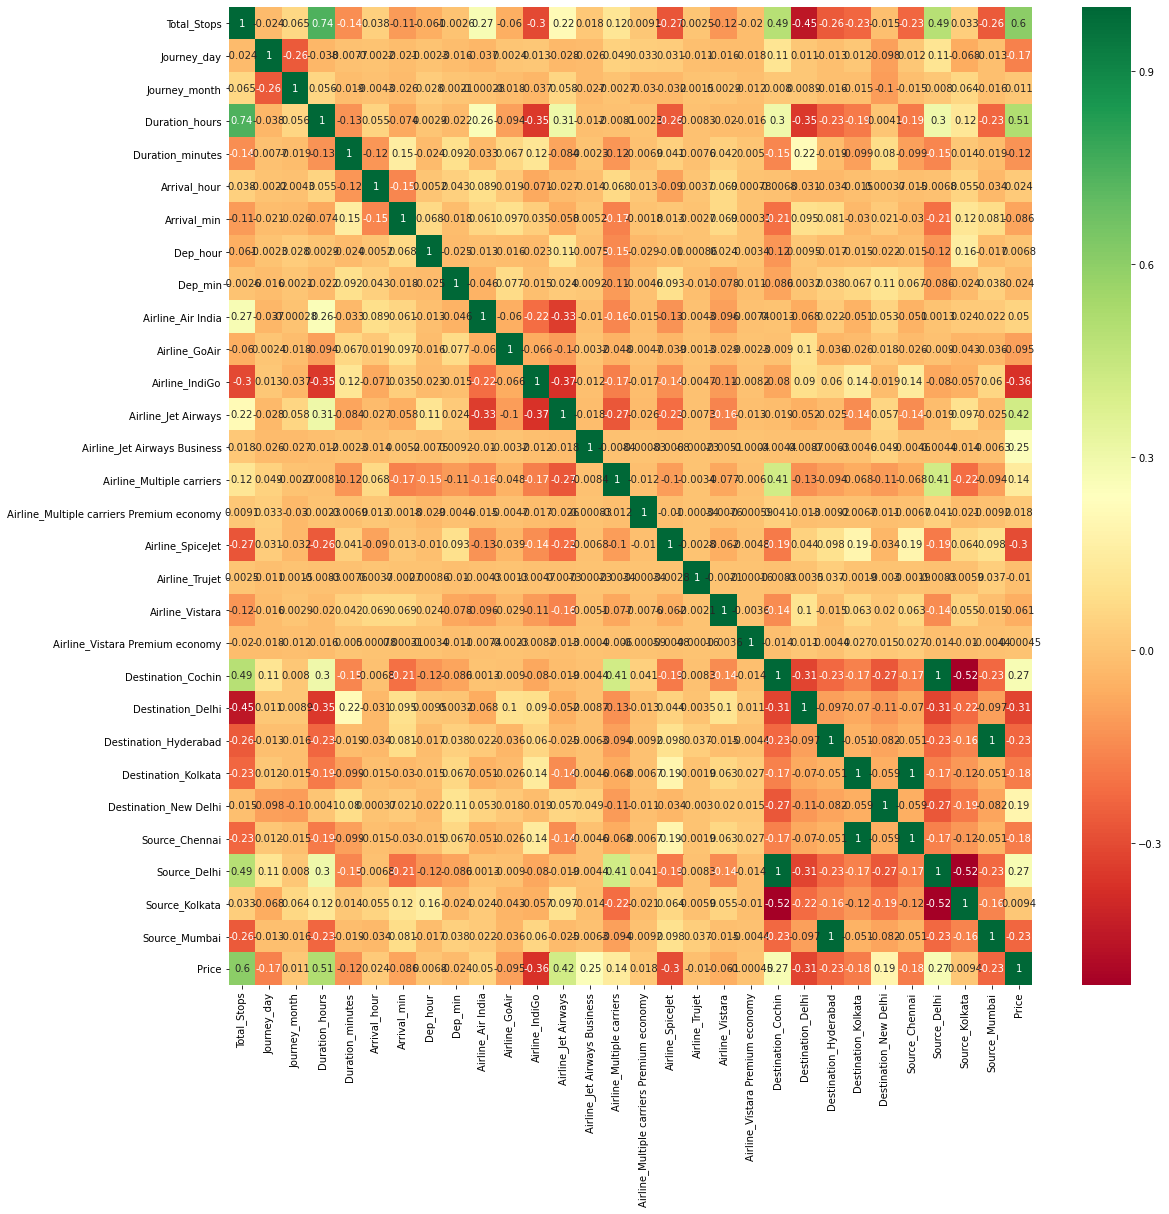

In [29]:
plt.figure(figsize = (18,18))
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn')

In [30]:
from sklearn.ensemble import ExtraTreesRegressor
Et = ExtraTreesRegressor()
Et.fit(X,y)

g:\anaconda\anaconda_nav\envs\tf\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [31]:
Et.feature_importances_

array([2.35481704e-01, 1.06724201e-01, 8.56668725e-02, 8.33540776e-02,
       1.76020943e-02, 2.84653125e-02, 2.06672100e-02, 2.51271664e-02,
       2.46678395e-02, 1.29568887e-02, 1.23541055e-03, 1.92660128e-02,
       1.49871769e-01, 6.78636465e-02, 2.32655212e-02, 1.05319828e-03,
       2.73361121e-03, 2.14241653e-05, 5.36559990e-03, 1.61848125e-04,
       1.73202606e-02, 6.16131459e-03, 4.06992902e-03, 3.31530094e-04,
       2.25527301e-02, 7.69416000e-04, 2.43247875e-02, 5.09661214e-03,
       7.82201172e-03])

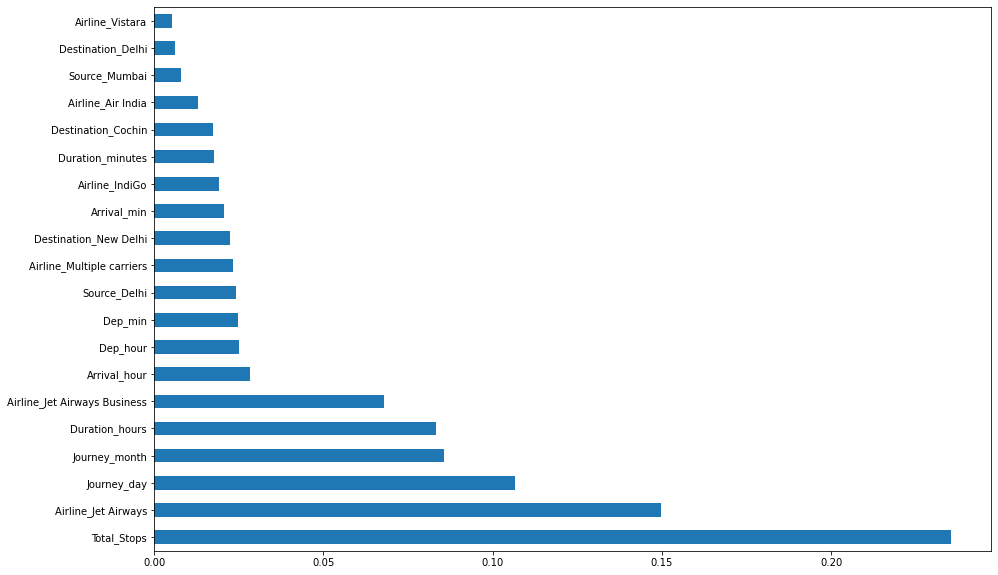

In [32]:
plt.figure(figsize = (15,10))
imp_features = pd.Series(Et.feature_importances_,index=X.columns)
imp_features.nlargest(20).plot(kind='barh')

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [58]:
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

g:\anaconda\anaconda_nav\envs\tf\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
from sklearn.metrics import r2_score

In [60]:
y_pred = rf.predict(X_test)

In [61]:
r2_score(y_pred,y_test)

0.761213771474472

In [62]:
rf.score(X_test,y_test)

0.7976785971017646

In [63]:
rf.score(X_train,y_train)

0.8220558274421242

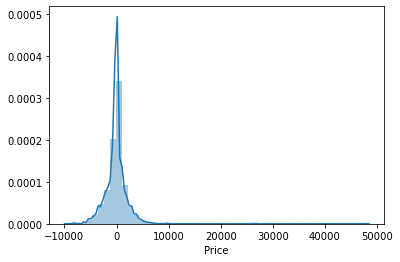

In [40]:
sns.distplot(y_test-y_pred)

In [41]:
bg= GradientBoostingRegressor()
bg.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [42]:
bg.score(X_train,y_train)

0.7906723793811915

In [43]:
bg.score(X_test,y_test)

0.7942595917122065

In [68]:
import pickle
pickle.dump(rf,open('rf_model.pickle','wb'))

In [54]:
X = X[['Total_Stops', 'Journey_day', 'Journey_month', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai']]


In [56]:
X.head()

,Total_Stops,Journey_day,Journey_month,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,...,Airline_Vistara Premium economy,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,24,3,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,2,5,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,6,9,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,1,5,12,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,3,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [51]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [52]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [64]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [65]:
X.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai'],
      dtype='object')

In [67]:
X['Journey_day']

0        24
1         5
2         6
3         5
4         3
         ..
10678     4
10679    27
10680    27
10681     3
10682     5
Name: Journey_day, Length: 10682, dtype: int64